In [1]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
fields= ['U','p','k','omega', 'nut']
mainfolder='airfoil2d/airFoil_450_newnorm'

xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05

In [3]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d/airFoil_450_newnorm
airFoil_450_mse_0
airFoil_450_mse_20
write airfoil2d/airFoil_450_newnorm/input.npy


In [4]:
data=np.load(mainfolder+'/input.npy')

In [5]:
normal=np.load('cfdnetplus_models/model_sep/'+'normal.npy')
data=data*(1/normal)

ValueError: operands could not be broadcast together with shapes (1,66,256,7) (6,) 

In [74]:
modelfolder='cfdnetplus_models/model_sep/model_Ux'
model_Ux = tf.keras.models.load_model(modelfolder)
modelfolder='cfdnetplus_models/model_sep/model_Uy'
model_Uy = tf.keras.models.load_model(modelfolder)
modelfolder='cfdnetplus_models/model_sep/model_p'
model_p = tf.keras.models.load_model(modelfolder)
modelfolder='cfdnetplus_models/model_sep/model_komeganut'
model_kon = tf.keras.models.load_model(modelfolder)

#normal=np.load(modelfolder+'normal.npy')
#model = tf.keras.models.load_model(modelfolder)

In [75]:
pred_Ux=model_Ux.predict(data[:,:,:,[0]])
pred_Uy=model_Uy.predict(data[:,:,:,[1]])
[a,b,c,d]=pred_U.shape
pred_Uz=np.zeros((a,b,c,1))
pred_p=model_p.predict(data[:,:,:,[3]])
pred_kon=model_kon.predict(data[:,:,:,[4,5,6]])
pred=np.concatenate((pred_U,pred_Uz,pred_p,pred_kon),3)
print(pred.shape)
np.save(mainfolder+'/pred',pred*normal)
data=data*normal

1/1 [==============================] - 0s 101ms/step
(1, 66, 256, 7)


C:\Users\hansi\AppData\Local\Temp\ipykernel_2776\2076246516.py:10: RuntimeWarning: invalid value encountered in multiply
  data=data*normal


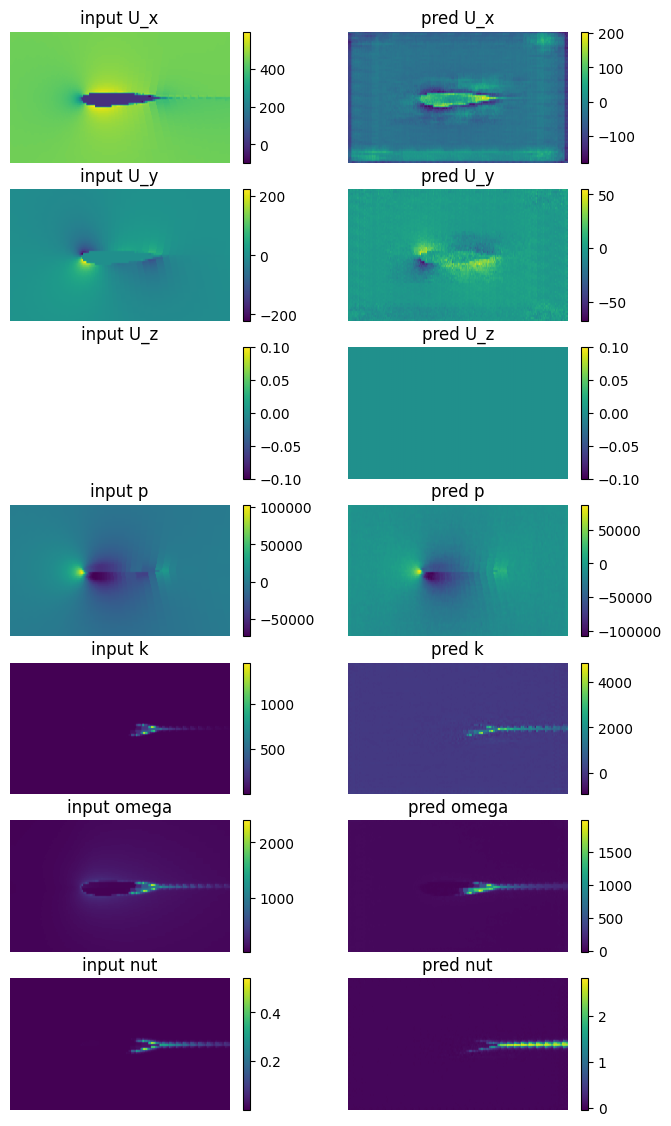

In [76]:
pred=np.load(mainfolder+'/pred.npy')
n=0
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

In [77]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_450_0
airFoil_450_20
folder airfoil2d/airFoil_450/21 was created
write airfoil2d/airFoil_450/21/U
write airfoil2d/airFoil_450/21/p
write airfoil2d/airFoil_450/21/k
write airfoil2d/airFoil_450/21/omega
write airfoil2d/airFoil_450/21/nut
